In [ ]:
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D,AveragePooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd

In [2]:
d=pd.read_csv(r"C:\Users\dhanu\Desktop\Mini Project\code_new\five.csv")
#1 zcr
#2 to 11 chroma stft
# 12 to 32 mfcc
#33 rms
# rest mel

X = d.iloc[: ,:-1].values
Y = d['label'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
y_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [3]:
x_train_zcr,x_train_chroma_stft,x_train_mfcc,x_train_rms,x_train_mel=[],[],[],[],[]
x_test_zcr,x_test_chroma_stft,x_test_mfcc,x_test_rms,x_test_mel=[],[],[],[],[]

for i in range(len(x_train)):
    x_train_zcr.append([x_train[i][0]])
    x_train_chroma_stft.append(x_train[i][1:12])
    x_train_mfcc.append(x_train[i][12:33])
    x_train_rms.append([x_train[i][33]])
    x_train_mel.append(x_train[i][34:])
for i in range(len(x_test)):  
    x_test_zcr.append([x_test[i][0]])
    x_test_chroma_stft.append(x_test[i][1:12])
    x_test_mfcc.append(x_test[i][12:33])
    x_test_rms.append([x_test[i][33]])
    x_test_mel.append(x_test[i][34:])
x_train_zcr,x_train_chroma_stft,x_train_mfcc,x_train_rms,x_train_mel=np.array(x_train_zcr),np.array(x_train_chroma_stft),np.array(x_train_mfcc),np.array(x_train_rms),np.array(x_train_mel)
x_test_zcr,x_test_chroma_stft,x_test_mfcc,x_test_rms,x_test_mel=np.array(x_test_zcr),np.array(x_test_chroma_stft),np.array(x_test_mfcc),np.array(x_test_rms),np.array(x_test_mel)


In [17]:
model = Sequential()
model.add(layers.LSTM(64, input_shape=(x_train.shape[1],1)))
model.add(layers.Dense(5, activation = 'softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])
print(x_train.shape)
history = model.fit(x_train, y_train, 
                      epochs=100, 
                      validation_data = (x_test, y_test))

pred_test_1 = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test_1)
y_test_1 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_1.flatten()
df.head()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 64)                16896     
                                                                 
 dense_10 (Dense)            (None, 5)                 325       
                                                                 
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________
None
(7211, 162)
Epoch 1/100
226/226 [==============================] - 14s 56ms/step - loss: 1.5847 - categorical_accuracy: 0.2439 - val_loss: 1.6127 - val_categorical_accuracy: 0.1884
Epoch 2/100
226/226 [==============================] - 12s 54ms/step - loss: 1.5676 - categorical_accuracy: 0.2553 - val_loss: 1.4760 - val_categorical_accuracy: 0.3440
Epoch 3/100
226/226 [==============================] - 12s 54ms/step - loss: 1.5117 - cate

226/226 [==============================] - 9s 41ms/step - loss: 1.0833 - categorical_accuracy: 0.5646 - val_loss: 1.2042 - val_categorical_accuracy: 0.5042
Epoch 94/100
226/226 [==============================] - 9s 41ms/step - loss: 1.0896 - categorical_accuracy: 0.5598 - val_loss: 1.1541 - val_categorical_accuracy: 0.5329
Epoch 95/100
226/226 [==============================] - 9s 41ms/step - loss: 1.0807 - categorical_accuracy: 0.5671 - val_loss: 1.1361 - val_categorical_accuracy: 0.5428
Epoch 96/100
226/226 [==============================] - 9s 42ms/step - loss: 1.0779 - categorical_accuracy: 0.5614 - val_loss: 1.1548 - val_categorical_accuracy: 0.5462
Epoch 97/100
226/226 [==============================] - 9s 42ms/step - loss: 1.0669 - categorical_accuracy: 0.5709 - val_loss: 1.1193 - val_categorical_accuracy: 0.5507
Epoch 98/100
226/226 [==============================] - 9s 41ms/step - loss: 1.0733 - categorical_accuracy: 0.5647 - val_loss: 1.1098 - val_categorical_accuracy: 0.5574

,Predicted Labels,Actual Labels
0,disgust,fear
1,sad,fear
2,fear,happy
3,sad,sad
4,sad,sad


In [18]:

model = Sequential()
model.add(layers.LSTM(64,input_shape=(x_train_mel.shape[1],1)))
model.add(layers.Dense(5, activation = 'softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])
print(x_train.shape)
history_1 = model.fit(x_train_mel, y_train, 
                      epochs=100, 
                      validation_data = (x_test_mel, y_test))
pred_test_2 = model.predict(x_test_mel)
print(model.evaluate(pred_test_2,y_test))
y_pred = encoder.inverse_transform(pred_test_2)
y_test_2 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_2.flatten()
df.head(10)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 64)                16896     
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                                 
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________
None
(7211, 162)
Epoch 1/100
226/226 [==============================] - 8s 30ms/step - loss: 1.5440 - categorical_accuracy: 0.2782 - val_loss: 1.4701 - val_categorical_accuracy: 0.3444
Epoch 2/100
226/226 [==============================] - 7s 32ms/step - loss: 1.4802 - categorical_accuracy: 0.3359 - val_loss: 1.4483 - val_categorical_accuracy: 0.3673
Epoch 3/100
226/226 [==============================] - 7s 32ms/step - loss: 1.4400 - categor

226/226 [==============================] - 7s 32ms/step - loss: 1.2014 - categorical_accuracy: 0.4904 - val_loss: 1.2252 - val_categorical_accuracy: 0.4929
Epoch 94/100
226/226 [==============================] - 7s 32ms/step - loss: 1.2189 - categorical_accuracy: 0.4899 - val_loss: 1.2465 - val_categorical_accuracy: 0.4813
Epoch 95/100
226/226 [==============================] - 7s 32ms/step - loss: 1.2101 - categorical_accuracy: 0.4884 - val_loss: 1.2448 - val_categorical_accuracy: 0.4913
Epoch 96/100
226/226 [==============================] - 7s 32ms/step - loss: 1.2301 - categorical_accuracy: 0.4858 - val_loss: 1.2327 - val_categorical_accuracy: 0.4917
Epoch 97/100
226/226 [==============================] - 7s 33ms/step - loss: 1.2262 - categorical_accuracy: 0.4869 - val_loss: 1.2444 - val_categorical_accuracy: 0.5075
Epoch 98/100
226/226 [==============================] - 7s 33ms/step - loss: 1.2286 - categorical_accuracy: 0.4808 - val_loss: 1.2458 - val_categorical_accuracy: 0.4767

,Predicted Labels,Actual Labels
0,sad,fear
1,fear,fear
2,angry,happy
3,sad,sad
4,sad,sad
5,happy,happy
6,angry,angry
7,sad,happy
8,sad,sad
9,angry,angry


In [3]:
model = Sequential()
model.add(layers.LSTM(64*3,  input_shape=(x_train_chroma_stft.shape[1],1)))
model.add(Dropout(0.5))
model.add(layers.LSTM(64*2))
model.add(Dropout(0.5))
model.add(layers.LSTM(64))
model.add(layers.Dense(5, activation = 'softmax'))
print(model.summary())


model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])
print(x_train_mfcc.shape)
history_2 = model.fit(x_train_mfcc, y_train, 
                      epochs=100, 
                      validation_data = (x_test_mfcc, y_test))
pred_test_3 = model.predict(x_test_mfcc)
print(model.evaluate(pred_test_3,y_test))
y_pred = encoder.inverse_transform(pred_test_3)
y_test_3 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_3.flatten()
df.head(10)

NameError: name 'Sequential' is not defined

In [21]:
model = Sequential()
model.add(layers.LSTM(64,  input_shape=(x_train_rms.shape[1],1)))
model.add(layers.Dense(5, activation = 'softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])
print(x_train_rms.shape)
history_3 = model.fit(x_train_rms, y_train, 
                      epochs=100, 
                      validation_data = (x_test_rms, y_test))

pred_test_4 = model.predict(x_test_rms)
print(model.evaluate(pred_test_4,y_test))
y_pred = encoder.inverse_transform(pred_test_4)
y_test_4 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_4.flatten()
df.head(10)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 5)                 325       
                                                                 
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________
None
(7211, 1)
Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 1.6082 - categorical_accuracy: 0.2149 - val_loss: 1.6068 - val_categorical_accuracy: 0.2267
Epoch 2/100
226/226 [==============================] - 0s 1ms/step - loss: 1.6020 - categorical_accuracy: 0.2681 - val_loss: 1.5978 - val_categorical_accuracy: 0.2887
Epoch 3/100
226/226 [==============================] - 0s 1ms/step - loss: 1.5882 - categorical_

Epoch 94/100
226/226 [==============================] - 0s 2ms/step - loss: 1.4703 - categorical_accuracy: 0.3472 - val_loss: 1.4601 - val_categorical_accuracy: 0.3661
Epoch 95/100
226/226 [==============================] - 0s 2ms/step - loss: 1.4703 - categorical_accuracy: 0.3456 - val_loss: 1.4604 - val_categorical_accuracy: 0.3686
Epoch 96/100
226/226 [==============================] - 0s 2ms/step - loss: 1.4702 - categorical_accuracy: 0.3495 - val_loss: 1.4612 - val_categorical_accuracy: 0.3598
Epoch 97/100
226/226 [==============================] - 0s 2ms/step - loss: 1.4699 - categorical_accuracy: 0.3471 - val_loss: 1.4598 - val_categorical_accuracy: 0.3735
Epoch 98/100
226/226 [==============================] - 0s 2ms/step - loss: 1.4699 - categorical_accuracy: 0.3475 - val_loss: 1.4606 - val_categorical_accuracy: 0.3515
Epoch 99/100
226/226 [==============================] - 0s 1ms/step - loss: 1.4695 - categorical_accuracy: 0.3479 - val_loss: 1.4607 - val_categorical_accuracy:

,Predicted Labels,Actual Labels
0,angry,fear
1,sad,fear
2,angry,happy
3,sad,sad
4,sad,sad
5,happy,happy
6,angry,angry
7,sad,happy
8,sad,sad
9,angry,angry


In [27]:
model = Sequential()
model.add(layers.LSTM(64, input_shape=(x_train_chroma_stft.shape[1],1)))
model.add(layers.Dense(5, activation = 'softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])
print(x_train.shape)
history_4 = model.fit(x_train_chroma_stft, y_train, 
                      epochs=100, 
                      validation_data = (x_test_chroma_stft, y_test))
pred_test_5 = model.predict(x_test_chroma_stft)
print(model.evaluate(pred_test_5,y_test))
y_pred = encoder.inverse_transform(pred_test_5)
y_test_5 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_5.flatten()
df.head(10)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 64)                16896     
                                                                 
 dense_18 (Dense)            (None, 5)                 325       
                                                                 
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________
None
(7211, 162)
Epoch 1/100
226/226 [==============================] - 2s 5ms/step - loss: 1.6090 - categorical_accuracy: 0.2068 - val_loss: 1.6065 - val_categorical_accuracy: 0.2030
Epoch 2/100
226/226 [==============================] - 1s 4ms/step - loss: 1.6025 - categorical_accuracy: 0.2234 - val_loss: 1.6016 - val_categorical_accuracy: 0.2134
Epoch 3/100
226/226 [==============================] - 1s 4ms/step - loss: 1.5954 - categorica

Epoch 94/100
226/226 [==============================] - 1s 4ms/step - loss: 1.3985 - categorical_accuracy: 0.3755 - val_loss: 1.4385 - val_categorical_accuracy: 0.3536
Epoch 95/100
226/226 [==============================] - 1s 4ms/step - loss: 1.3970 - categorical_accuracy: 0.3747 - val_loss: 1.4454 - val_categorical_accuracy: 0.3478
Epoch 96/100
226/226 [==============================] - 1s 4ms/step - loss: 1.3996 - categorical_accuracy: 0.3773 - val_loss: 1.4306 - val_categorical_accuracy: 0.3627
Epoch 97/100
226/226 [==============================] - 1s 4ms/step - loss: 1.3955 - categorical_accuracy: 0.3814 - val_loss: 1.4328 - val_categorical_accuracy: 0.3565
Epoch 98/100
226/226 [==============================] - 1s 4ms/step - loss: 1.3943 - categorical_accuracy: 0.3747 - val_loss: 1.4371 - val_categorical_accuracy: 0.3490
Epoch 99/100
226/226 [==============================] - 1s 4ms/step - loss: 1.3927 - categorical_accuracy: 0.3778 - val_loss: 1.4616 - val_categorical_accuracy:

,Predicted Labels,Actual Labels
0,angry,fear
1,sad,fear
2,angry,happy
3,angry,sad
4,disgust,sad
5,disgust,happy
6,disgust,angry
7,disgust,happy
8,happy,sad
9,disgust,angry


In [25]:
model = Sequential()
model.add(layers.LSTM(64,  input_shape=(x_train_chroma_stft.shape[1],1)))
model.add(layers.Dense(5, activation = 'softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', 
                optimizer='RMSProp', 
                metrics=['categorical_accuracy'])
print(x_train.shape)
history_5 = model.fit(x_train_zcr, y_train, 
                      epochs=100, 
                      validation_data = (x_test_zcr, y_test))
pred_test_6 = model.predict(x_test_zcr)
print(model.evaluate(pred_test_6,y_test))
y_pred = encoder.inverse_transform(pred_test_6)
y_test_6 = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test_5.flatten()
df.head(10)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 64)                16896     
                                                                 
 dense_17 (Dense)            (None, 5)                 325       
                                                                 
Total params: 17,221
Trainable params: 17,221
Non-trainable params: 0
_________________________________________________________________
None
(7211, 162)
Epoch 1/100
226/226 [==============================] - 2s 7ms/step - loss: 1.6093 - categorical_accuracy: 0.1969 - val_loss: 1.6088 - val_categorical_accuracy: 0.2130
Epoch 2/100
226/226 [==============================] - 0s 1ms/step - loss: 1.6082 - categorical_accuracy: 0.2134 - val_loss: 1.6083 - val_categorical_accuracy: 0.2109
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 1.6067 - categorica

Epoch 94/100
226/226 [==============================] - 0s 2ms/step - loss: 1.5816 - categorical_accuracy: 0.2646 - val_loss: 1.5791 - val_categorical_accuracy: 0.2812
Epoch 95/100
226/226 [==============================] - 0s 2ms/step - loss: 1.5810 - categorical_accuracy: 0.2682 - val_loss: 1.5785 - val_categorical_accuracy: 0.2712
Epoch 96/100
226/226 [==============================] - 0s 2ms/step - loss: 1.5807 - categorical_accuracy: 0.2701 - val_loss: 1.5783 - val_categorical_accuracy: 0.2712
Epoch 97/100
226/226 [==============================] - 0s 2ms/step - loss: 1.5805 - categorical_accuracy: 0.2683 - val_loss: 1.5782 - val_categorical_accuracy: 0.2766
Epoch 98/100
226/226 [==============================] - 0s 2ms/step - loss: 1.5801 - categorical_accuracy: 0.2661 - val_loss: 1.5782 - val_categorical_accuracy: 0.2899
Epoch 99/100
226/226 [==============================] - 0s 2ms/step - loss: 1.5797 - categorical_accuracy: 0.2725 - val_loss: 1.5772 - val_categorical_accuracy:

,Predicted Labels,Actual Labels
0,sad,fear
1,sad,fear
2,angry,happy
3,sad,sad
4,sad,sad
5,sad,happy
6,disgust,angry
7,sad,happy
8,angry,sad
9,angry,angry


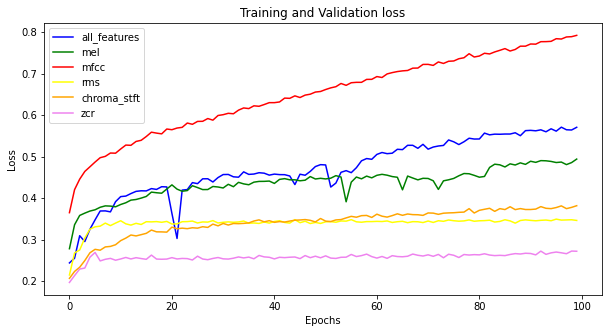

In [30]:
import matplotlib.pyplot as plt
l_1 = history.history['categorical_accuracy']
l_2 = history_1.history['categorical_accuracy']
l_3 = history_2.history['categorical_accuracy']
l_4 = history_3.history['categorical_accuracy']
l_5 = history_4.history['categorical_accuracy']
l_6 = history_5.history['categorical_accuracy']
plt.rcParams['figure.figsize'] = [10, 5]
epochs = range(0,100)
plt.plot(epochs, l_1, 'b', label='all_features')
plt.plot(epochs, l_2, 'g', label='mel')
plt.plot(epochs, l_3, 'red', label='mfcc')
plt.plot(epochs, l_4, 'yellow', label='rms')
plt.plot(epochs, l_5, 'orange', label='chroma_stft')
plt.plot(epochs, l_6, 'violet', label='zcr')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()